In [1]:
import numpy as np


In [2]:
def gauss_jordan(A,  b):

  A=np.array(A, dtype = float)
  b=np.array(b, dtype = float).reshape(-1, 1)
  n =A.shape[0]
  M = np.hstack([A,b])

  for l in range(n):
    pivot = M[l,l]
    if abs(pivot) < 1e-12:
      continue

    fator= pivot
    M[l,:] = M[l,:]/fator
    print(f"\n Trabalhando na coluna {l}")
    print(f"L{l} <- L{l}/{fator}")
    print(M)

    for ll in range(n):
      if ll == l:
        continue
      f = M[ll,l]
      M[ll,:] = M[ll,:] - f*M[l,:]

      print(f"\n Trabalhando na coluna {l}")
      print(f"L{ll} <- L{ll} - {f}L{l}")
      print(M)

  w= M[:,-1]

  return w, M






In [ ]:
A = np.array([[1,1,1],[2,3,7],[1,-1,2]])
print(A)
b = np.array([[6],[20],[4]])
print(b)

[[ 1  1  1]
 [ 2  3  7]
 [ 1 -1  2]]
[[ 6]
 [20]
 [ 4]]


In [ ]:
w = gauss_jordan(A,b)
print(w)


 Trabalhando na coluna 0
L0 <- L0/1.0
[[ 1.  1.  1.  6.]
 [ 2.  3.  7. 20.]
 [ 1. -1.  2.  4.]]

 Trabalhando na coluna 0
L1 <- L1 - 2.0L0
[[ 1.  1.  1.  6.]
 [ 0.  1.  5.  8.]
 [ 1. -1.  2.  4.]]

 Trabalhando na coluna 0
L2 <- L2 - 1.0L0
[[ 1.  1.  1.  6.]
 [ 0.  1.  5.  8.]
 [ 0. -2.  1. -2.]]

 Trabalhando na coluna 1
L1 <- L1/1.0
[[ 1.  1.  1.  6.]
 [ 0.  1.  5.  8.]
 [ 0. -2.  1. -2.]]

 Trabalhando na coluna 1
L0 <- L0 - 1.0L1
[[ 1.  0. -4. -2.]
 [ 0.  1.  5.  8.]
 [ 0. -2.  1. -2.]]

 Trabalhando na coluna 1
L2 <- L2 - -2.0L1
[[ 1.  0. -4. -2.]
 [ 0.  1.  5.  8.]
 [ 0.  0. 11. 14.]]

 Trabalhando na coluna 2
L2 <- L2/11.0
[[ 1.          0.         -4.         -2.        ]
 [ 0.          1.          5.          8.        ]
 [ 0.          0.          1.          1.27272727]]

 Trabalhando na coluna 2
L0 <- L0 - -4.0L2
[[1.         0.         0.         3.09090909]
 [0.         1.         5.         8.        ]
 [0.         0.         1.         1.27272727]]

 Trabalhando na colu

In [ ]:
w

array([3.09090909, 1.63636364, 1.27272727])

In [4]:
def matrizd(x, d:int):
  x= np.asarray(x, dtype=float)
  cols = [np.ones_like(x)] + [x**k for k in range(1,d+1)]
  return np.column_stack(cols)

def sums_S_T(x, y, d:int):
  x=np.asarray(x, dtype=float)
  y=np.asarray(y, dtype=float)

  S = [np.sum(x**k) for k in range(2*d+1)]


  T = [np.sum( (x**k) *y ) for k in range(d+1)]

  return np.asarray(S), T

def gerapelasoma(S,T, d:int):
  XtX = np.empty((d+1, d+1))
  for j in range(d+1):
    for k in  range(d+1):
      XtX[j,k] = S[j+k]
  Xty = np.array(T, dtype=float)

  return XtX, Xty.T


def RMSE(y,yhat):
  # gere um array com as diferenças entre y e yhat (yhat é o previsto pelo modelo. você pode calcular isso com as outras funções)

  # calcule o quadrado dos elementos desse array

  # faça a média

  # tire a raiz quadrada

  # retorne essa raiz

  return


In [12]:
x= [-1,0,1,2]
y=[0,1,2,5]

In [13]:
mx=matrizd(x,2)
print(mx)

[[ 1. -1.  1.]
 [ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]]


x= [0, 1, 2]


y= [ 2, 4, 7]






X =[1 0;
    1 1;
    1 2]

In [ ]:
x= [0, 1,2 ,3 ,4]
y=[1.2 , 2.9, 5.1, 6.8, 9.2]

In [ ]:
S, T = sums_S_T(x,y,1)

print(S)
print(T)

[ 5. 10. 30.]
[np.float64(25.2), np.float64(70.3)]


In [ ]:
S

array([ 5., 10., 30.])

In [17]:
xtx = mx.T @ mx
print(xtx)

xty = (mx.T @ y).reshape(-1,1)
print(xty)


[[ 4.  2.  6.]
 [ 2.  6.  8.]
 [ 6.  8. 18.]]
[[ 8.]
 [12.]
 [22.]]


In [24]:
# xtx *w = xty     -> w = inv(xtx)*xty

xtx_inv = np.linalg.inv(xtx)
print(xtx_inv)

modelo = xtx_inv @ xty

[[ 0.55  0.15 -0.25]
 [ 0.15  0.45 -0.25]
 [-0.25 -0.25  0.25]]


In [22]:
import matplotlib.pyplot as plt

In [27]:
print(mx)
print(modelo)

[[ 1. -1.  1.]
 [ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]]
[[0.7]
 [1.1]
 [0.5]]


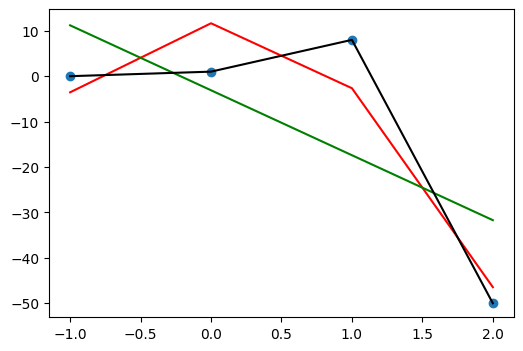

In [32]:
y=[0,1,8,-50]
mx1= matrizd(x,1)
xty1 = (mx1.T @ y).reshape(-1,1)
xtx1= mx1.T @ mx1
xtx1_inv = np.linalg.inv(xtx1)
modelo1 = xtx1_inv @ (mx1.T @ y)

mx2= matrizd(x,2)
xtx2= mx2.T @ mx2
xty2 = (mx2.T @ y).reshape(-1,1)
xtx2_inv = np.linalg.inv(xtx2)
modelo2 = xtx2_inv @ (mx2.T @ y)

mx3= matrizd(x,3)
xtx3= mx3.T @ mx3
xty3 = (mx3.T @ y).reshape(-1,1)
xtx3_inv = np.linalg.inv(xtx3)
modelo3 = xtx3_inv @ (mx3.T @ y)

plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.plot(x, mx2 @ modelo2, color= 'red')
plt.plot(x, mx1 @ modelo1, color= 'green')
plt.plot(x, mx3 @ modelo3, color= 'black')
plt.show()

In [ ]:
gauss_jordan(xtx,xty)


 Trabalhando na coluna 0
L0 <- L0/5.0
[[ 1.    2.    5.04]
 [10.   30.   70.3 ]]

 Trabalhando na coluna 0
L1 <- L1 - 10.0L0
[[ 1.    2.    5.04]
 [ 0.   10.   19.9 ]]

 Trabalhando na coluna 1
L1 <- L1/10.0
[[1.   2.   5.04]
 [0.   1.   1.99]]

 Trabalhando na coluna 1
L0 <- L0 - 2.0L1
[[1.   0.   1.06]
 [0.   1.   1.99]]


(array([1.06, 1.99]),
 array([[1.  , 0.  , 1.06],
        [0.  , 1.  , 1.99]]))

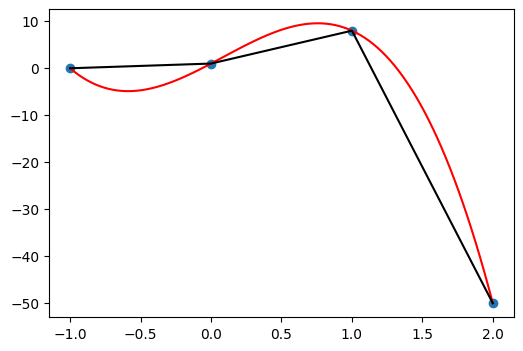

In [34]:
x_suave = np.linspace(min(x), max(x),100)

X_suave= matrizd(x_suave,3)
yhat= X_suave @ modelo3

plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.plot(x_suave, yhat, color= 'red')
plt.plot(x, mx3 @ modelo3, color= 'black')
plt.show()

In [107]:
x= [1 , 2 ,3 , 4]
y = [2 , 4, 6, 8]

z= [5,9,13,17]

x = np.asarray(x, dtype=float).reshape(-1,1)
y = np.asarray(y, dtype=float).reshape(-1,1)
z = np.asarray(z, dtype=float).reshape(-1,1)
X=np.hstack([np.ones_like(x),x,y])

#X = np.asarray([[1, 1, 2], [1 , 2, 4], [1, 3, 6], [1, 4,8]])

XTX = X.T @ X
XTy = X.T @ z
print(X)
print(XTX)
print(np.linalg.det(XTX))

[[1. 1. 2.]
 [1. 2. 4.]
 [1. 3. 6.]
 [1. 4. 8.]]
[[  4.  10.  20.]
 [ 10.  30.  60.]
 [ 20.  60. 120.]]
0.0


In [40]:
print(np.linalg.det(XTX))

0.0


In [41]:
import plotly.graph_objects as go

In [115]:
x1= [1 , 2 ,3 , 4]
x2 = [2 , 4, 6, 8]
y= [5,9,13,17]
fig = go.Figure(data=[ go.Scatter3d(x=x1, y=x2, z=y, mode='markers')])
fig.update_layout(
    scene = dict(
        xaxis = dict(range=[-10, 10]),
        yaxis = dict(range=[-10, 10]),
        zaxis = dict(range=[0, 20])
    )
)
fig.show()

def calcloss(X, y, w, penal = 1 ):
  y_hat = X @ w

  residuos =y-y_hat
  mse =np.mean(residuos**2) + penal*np.sum(w[1:]**2)

  return mse






In [92]:
w1_mesh, w2_mesh = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
loss_surface = np.empty_like(w1_mesh)
for i in range(w1_mesh.shape[0]):
  for j in range(w1_mesh.shape[1]):
    w1 = w1_mesh[i,j]
    w2 = w2_mesh[i,j]
    loss_surface[i,j] = calcloss(X, y, np.array([1, w1, w2]), penal= 100)


fig = go.Figure(data=[go.Surface(x=w1_mesh, y=w2_mesh, z=loss_surface)])
fig.show()

In [108]:
XTXp = XTX- 0.1*np.eye(XTX.shape[0])

print(XTXp)
np.linalg.inv(XTXp)

ws=np.linalg.inv(XTXp)@XTy

print(ws)

[[  3.9  10.   20. ]
 [ 10.   29.9  60. ]
 [ 20.   60.  119.9]]
[[1.12989008]
 [0.79186857]
 [1.58373715]]


In [113]:
XTXp = XTX- 10.1*np.eye(XTX.shape[0])

print(XTXp)
np.linalg.inv(XTXp)

ws=np.linalg.inv(XTXp)@XTy

print(ws)

x1= [1 , 2 ,3 , 4]
x2 = [2 , 4, 6, 8]
y= [5,9,13,17]

xmesh , ymesh = np.meshgrid(np.linspace(1,4,20),np.linspace(2,8,20))
zmesh = ws[0] +ws[1]*xmesh + ws[2]*ymesh

fig = go.Figure(data=[ go.Scatter3d(x=x1, y=x2, z=y, mode='markers'),
                      go.Surface(x=xmesh, y= ymesh, z=zmesh, opacity=0.5)])



fig.show()

[[ -6.1  10.   20. ]
 [ 10.   19.9  60. ]
 [ 20.   60.  109.9]]
[[0.2544721 ]
 [0.9110456 ]
 [1.82209119]]
